In [9]:
import numpy as np
import SimLight as sl
import SimLight.plottools as slpl

In [10]:
wavelength = 0.633  # µm
size = 25.4  # mm
res = 500  # pixel number
f = 50  # mm
A = 0

In [11]:
F = sl.PlaneWave(wavelength, size, res)
F.__dict__

{'_wavelength': 0.633,
 '_size': 25.4,
 '_N': 500,
 '_complex_amp': array([[1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
        ...,
        [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j]]),
 '_x_tilt': 0,
 '_y_tilt': 0,
 '_field_type': 'plane wave'}

In [12]:
L = sl.Lens.new_lens(size, f)
Z = sl.zernike.ZernikeCofficients(15)
Z.cofficients[5] = 1 * A
Z.cofficients[8] = 0.2 * A
Z.cofficients[9] = 0.5 * A
Z.__dict__

{'_j': 15,
 '_input_cofficients': [],
 '_n': array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4]),
 '_m': array([ 0, -1,  1, -2,  0,  2, -3, -1,  1,  3, -4, -2,  0,  2,  4]),
 '_norm': array([0.        , 0.70710678, 0.70710678, 0.57735027, 0.57735027,
        0.57735027, 0.5       , 0.5       , 0.5       , 0.5       ,
        0.4472136 , 0.4472136 , 0.4472136 , 0.4472136 , 0.4472136 ]),
 '_cofficients': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

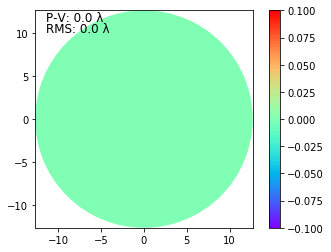

In [13]:
F = sl.aberration(F, Z)
F.plot_wavefront(dimension=2, mask_r=1)

In [14]:
x = np.linspace(-F.size / 2, F.size / 2, F.N)
X, Y = np.meshgrid(x, x)
R = np.sqrt(X**2 + Y**2)
F.complex_amp[R >= F.size/2] = 0
F.__dict__

{'_wavelength': 0.633,
 '_size': 25.4,
 '_N': 500,
 '_complex_amp': array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]]),
 '_x_tilt': 0,
 '_y_tilt': 0,
 '_field_type': 'plane wave'}

In [15]:
F = sl.near_field_propagation(F, L, f)

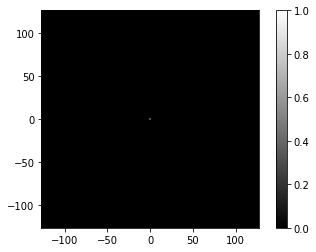

In [16]:
F.plot_intensity(dimension=2, norm_type=1)